# Association Analysis for Restaurant Menu
### Desirable outcomes from the client (restaurant owner):
- Wine suggestions for each meat order
- Most popular meal to display on advertisements for the restaurant
- Interesting order habits of customers

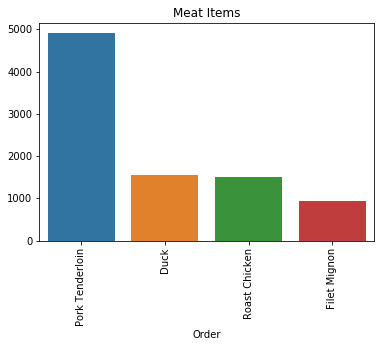

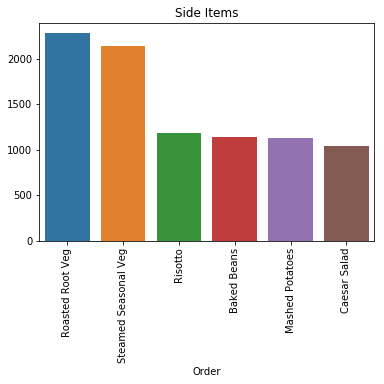

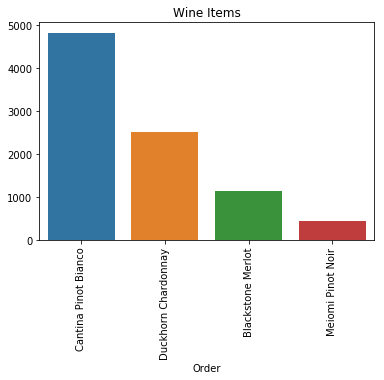

In [149]:
# Get necessary packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import os

#Set global print option for pandas
pd.set_option('display.max_columns', 15)

# Take a look into restaurant orders
restaurant = pd.read_csv(r"C:\Users\Jackson Cabell\Documents\Homework\Data Mining\HW1\restaurantData.csv")
#print(restaurant.head(8))

#Calculate number of transactions in dataset (8499)
len(np.unique(restaurant.iloc[:,2]))

#Plot number of times each Meat item was ordered
sns.countplot(x = 'order',
              data = restaurant,
              order = restaurant[restaurant['type']=='Meat']['order'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Order')
plt.ylabel('')
plt.title('Meat Items')
plt.show()

#Plot number of times each Side item was ordered
sns.countplot(x = 'order',
              data = restaurant,
              order = restaurant[restaurant['type']=='Side']['order'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Order')
plt.ylabel('')
plt.title('Side Items')
plt.show()


#Plot number of times each Wine item was ordered
sns.countplot(x = 'order',
              data = restaurant,
              order = restaurant[restaurant['type']=='Wine']['order'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Order')
plt.ylabel('')
plt.title('Wine Items')
plt.show()

#Look at breakdown of orders by Type (Meat, Side, Wine) 
bkd = restaurant.groupby(['type'])['order'].value_counts()
#print(bkd)

#Pre-process the data for apriori function for Market Basket Analysis
df = restaurant.groupby(['orderNumber', 'order']).size().reset_index(name='count')

order = (df.groupby(['orderNumber','order'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('orderNumber'))

#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
order_sets = order.applymap(encode_units)

# Only look at Meats and Wines

In [150]:
from numpy import logical_or as orr
from numpy import logical_and as andd

In [151]:
#Only look at data for meats and wines
meatwine = restaurant[restaurant['type']!='Side']

#Pre-process the data for apriori function for Market Basket Analysis
df = meatwine.groupby(['orderNumber', 'order']).size().reset_index(name='count')

order = (df.groupby(['orderNumber','order'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('orderNumber'))

#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Filter to customers who purchased at least one meat and at least one wine
ordermw = order[andd(
            orr(order['Blackstone Merlot']==1,orr(
             order['Cantina Pinot Bianco']==1, orr(
             order['Duckhorn Chardonnay']==1,
             order['Meiomi Pinot Noir']==1))), orr(order['Duck']==1, orr(
                                              order['Filet Mignon']==1, orr(
                                              order['Pork Tenderloin']==1,
                                              order['Roast Chicken']==1)))
            )]
    
order_sets = ordermw.applymap(encode_units)

#Market Basket Analysis
#Generate order sets with a support of at least 1%
frequent_ordersets = apriori(order_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_ordersets, metric="lift")

# Sort by confidence to see popular pairings of Wine with a given Meat
rules.sort_values('confidence', ascending = False, inplace = True)
rules

# Sort by confidence to see popular pairings of Wine with a given Meat
rules.sort_values('confidence', ascending = False, inplace = True)
rules



# Interesting findings of Wine Pairs:
#     1) Filet Mignon => Blackstone Merlot has support = 0.091182, confidence = 0.824810, lift = 6.250357
#     2) Roast Chicken => Duckhorn Chardonnay has support = 0.141585, confidence = 0.803962, lift = 2.7447
#         # alternate => Meiomi Pinot Noir support = 0.019006, confidence = 0.107923, lift = 2.120965
#     3) Duck => Duckhorn Chardonnay has support = 0.1288, confidence = 0.7222, lift = 2.4655
#     4) Pork Tenderloine => Cantina Pinot Bianco has support = 0.517503, confidence = 0.925161., lift = 1.686224




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(Cantina Pinot Bianco, Duckhorn Chardonnay)",(Pork Tenderloin),0.012871,0.559365,0.012150,0.943925,1.687495,0.004950,7.857994
3,(Cantina Pinot Bianco),(Pork Tenderloin),0.548659,0.559365,0.517503,0.943214,1.686224,0.210602,7.759602
2,(Pork Tenderloin),(Cantina Pinot Bianco),0.559365,0.548659,0.517503,0.925161,1.686224,0.210602,6.030853
0,(Filet Mignon),(Blackstone Merlot),0.110550,0.131962,0.091182,0.824810,6.250357,0.076594,4.954826
8,(Roast Chicken),(Duckhorn Chardonnay),0.176110,0.292915,0.141585,0.803962,2.744696,0.090000,3.606874
4,(Duck),(Duckhorn Chardonnay),0.178395,0.292915,0.128834,0.722185,2.465512,0.076580,2.545164
1,(Blackstone Merlot),(Filet Mignon),0.131962,0.110550,0.091182,0.690975,6.250357,0.076594,2.878251
9,(Duckhorn Chardonnay),(Roast Chicken),0.292915,0.176110,0.141585,0.483368,2.744696,0.090000,1.594732
5,(Duckhorn Chardonnay),(Duck),0.292915,0.178395,0.128834,0.439836,2.465512,0.076580,1.466721
13,(Meiomi Pinot Noir),(Roast Chicken),0.050884,0.176110,0.019006,0.373522,2.120965,0.010045,1.315115


# Looking at Meals

In [152]:
#Pre-process the data for apriori function for Market Basket Analysis
df = restaurant.groupby(['orderNumber', 'order']).size().reset_index(name='count')

order = (df.groupby(['orderNumber','order'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('orderNumber'))

#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
order_sets = order.applymap(encode_units)

In [153]:
#Generate order sets with a support of at least 1%
frequent_ordersets = apriori(order_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_ordersets, metric="lift")

# Sort by support to see the most popular meals in the restaurant
rules.sort_values('support', ascending = False, inplace = True)
rules.head(50)

# Most popular meal:
#     1) Pork Tenderloin and Roasted Root Veg has support 0.144370 (combined with Catina has support 0.133427)
#        Pork Tenderloin and Steamed Seasonal Veg has support 0.1353
#        Pork Tenderloin and Catina Point Bianco has support 0.52159



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(Cantina Pinot Bianco),(Pork Tenderloin),0.552889,0.563125,0.521591,0.943392,1.675280,0.210245,7.717576
40,(Pork Tenderloin),(Cantina Pinot Bianco),0.563125,0.552889,0.521591,0.926243,1.675280,0.210245,6.061970
92,(Roasted Root Veg),(Pork Tenderloin),0.256148,0.563125,0.144370,0.563620,1.000878,0.000127,1.001133
93,(Pork Tenderloin),(Roasted Root Veg),0.563125,0.256148,0.144370,0.256373,1.000878,0.000127,1.000303
44,(Roasted Root Veg),(Cantina Pinot Bianco),0.256148,0.552889,0.141546,0.552595,0.999470,-0.000075,0.999345
45,(Cantina Pinot Bianco),(Roasted Root Veg),0.552889,0.256148,0.141546,0.256012,0.999470,-0.000075,0.999817
64,(Roast Chicken),(Duckhorn Chardonnay),0.176256,0.292152,0.141428,0.802403,2.746526,0.089935,3.582285
65,(Duckhorn Chardonnay),(Roast Chicken),0.292152,0.176256,0.141428,0.484092,2.746526,0.089935,1.596687
94,(Steamed Seasonal Veg),(Pork Tenderloin),0.239911,0.563125,0.135310,0.564002,1.001557,0.000210,1.002011
95,(Pork Tenderloin),(Steamed Seasonal Veg),0.563125,0.239911,0.135310,0.240284,1.001557,0.000210,1.000492


In [154]:
############## Only look at food, not wines ####################
#Generate order sets with a support of at least 1%
frequent_ordersets = apriori(order_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_ordersets, metric="lift")

#Sort rules for rules without wine
def tuple_sort(x):
    if (any('Blackstone Merlot' in i for i in x) or
        any('Cantina Pinot Bianco' in i for i in x) or
        any('Duckhorn Chardonnay' in i for i in x) or
        any('Meiomi Pinot Noir' in i for i in x)) : 
            return('Wine')
    else:
        return('Not Wine')

#Create indicator columns for if antecedent is a wine or if consequent is a wine
rules['antwine'] = rules.iloc[:,0].apply(tuple_sort)
rules['conwine'] = rules.iloc[:,1].apply(tuple_sort)

#Sort out the wines
rules = rules[andd(rules['antwine']=='Not Wine', rules['conwine']=='Not Wine')]

# Sort by confidence to see interesting order habits
rules.sort_values('confidence', ascending = False, inplace = True)
rules.iloc[6:50,]

# Interesting findings:
#     1) Filet Mignon =>  Roasted Root Veg has support = 0.029062, confidence = 0.265877
#     2) Roast Chicken => Steamed Seasonal Veg has support = 0.045652, confidence = 0.259012
#     3) Duck => Roasted Root Veg has support = 0.04588, confidence = 0.2542
#     4) Mashed Potatoes => Duck has support 0.025532, confidence 0.202993



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antwine,conwine
77,(Filet Mignon),(Roasted Root Veg),0.109307,0.256148,0.029062,0.265877,1.037984,0.001064,1.013253,Not Wine,Not Wine
101,(Roast Chicken),(Steamed Seasonal Veg),0.176256,0.239911,0.045652,0.259012,1.079619,0.003367,1.025778,Not Wine,Not Wine
93,(Pork Tenderloin),(Roasted Root Veg),0.563125,0.256148,0.144370,0.256373,1.000878,0.000127,1.000303,Not Wine,Not Wine
57,(Duck),(Roasted Root Veg),0.180492,0.256148,0.045888,0.254237,0.992541,-0.000345,0.997438,Not Wine,Not Wine
98,(Roast Chicken),(Roasted Root Veg),0.176256,0.256148,0.044711,0.253672,0.990333,-0.000436,0.996682,Not Wine,Not Wine
79,(Filet Mignon),(Steamed Seasonal Veg),0.109307,0.239911,0.027180,0.248654,1.036446,0.000956,1.011638,Not Wine,Not Wine
95,(Pork Tenderloin),(Steamed Seasonal Veg),0.563125,0.239911,0.135310,0.240284,1.001557,0.000210,1.000492,Not Wine,Not Wine
59,(Duck),(Steamed Seasonal Veg),0.180492,0.239911,0.040005,0.221643,0.923856,-0.003297,0.976530,Not Wine,Not Wine
51,(Mashed Potatoes),(Duck),0.125780,0.180492,0.025532,0.202993,1.124668,0.002830,1.028233,Not Wine,Not Wine
55,(Risotto),(Duck),0.132721,0.180492,0.025650,0.193262,1.070754,0.001695,1.015830,Not Wine,Not Wine


# Look at Meat and Sides Only

In [155]:
#Only look at data for meats and wines
meatside = restaurant[restaurant['type']!='Wine']

#Pre-process the data for apriori function for Market Basket Analysis
df = meatside.groupby(['orderNumber', 'order']).size().reset_index(name='count')

order = (df.groupby(['orderNumber','order'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('orderNumber'))

#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
order_sets = order.applymap(encode_units)

#Market Basket Analysis
#Generate order sets with a support of at least 1%
frequent_ordersets = apriori(order_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_ordersets, metric="lift")

# Sort by confidence to see popular order pairings of Side(s) and Meat
rules.sort_values('confidence', ascending = False, inplace = True)
rules


# Interesting findings:
#     1) Caeser Salad => Blackstone Merlot has support = 0.091182, confidence = 0.824810, lift = 6.250357
#     2) Roast Chicken => Duckhorn Chardonnay has support = 0.141585, confidence = 0.803962, lift = 2.7447
        ## alternate => Meiomi Pinot Noir support = 0.019006, confidence = 0.107923, lift = 2.120965
#     3) Duck => Duckhorn Chardonnay has support = 0.1288, confidence = 0.7222, lift = 2.4655
#     4) Pork Tenderloine => Cantina Pinot Bianco has support = 0.517503, confidence = 0.925161., lift = 1.686224

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Caesar Salad),(Pork Tenderloin),0.116249,0.563125,0.066831,0.574899,1.020908,0.001369,1.027696
4,(Baked Beans),(Pork Tenderloin),0.129427,0.563125,0.073420,0.567273,1.007365,0.000537,1.009585
40,(Steamed Seasonal Veg),(Pork Tenderloin),0.239911,0.563125,0.135310,0.564002,1.001557,0.000210,1.002011
38,(Roasted Root Veg),(Pork Tenderloin),0.256148,0.563125,0.144370,0.563620,1.000878,0.000127,1.001133
33,(Mashed Potatoes),(Pork Tenderloin),0.125780,0.563125,0.070008,0.556595,0.988404,-0.000821,0.985273
37,(Risotto),(Pork Tenderloin),0.132721,0.563125,0.073420,0.553191,0.982360,-0.001318,0.977768
29,(Filet Mignon),(Roasted Root Veg),0.109307,0.256148,0.029062,0.265877,1.037984,0.001064,1.013253
47,(Roast Chicken),(Steamed Seasonal Veg),0.176256,0.239911,0.045652,0.259012,1.079619,0.003367,1.025778
39,(Pork Tenderloin),(Roasted Root Veg),0.563125,0.256148,0.144370,0.256373,1.000878,0.000127,1.000303
21,(Duck),(Roasted Root Veg),0.180492,0.256148,0.045888,0.254237,0.992541,-0.000345,0.997438
